# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

06:54:05 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=34744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=621518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=950132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=540129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=154543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=527397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

06:54:07 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=312038;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=400675;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

06:54:08 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=5325;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=659469;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

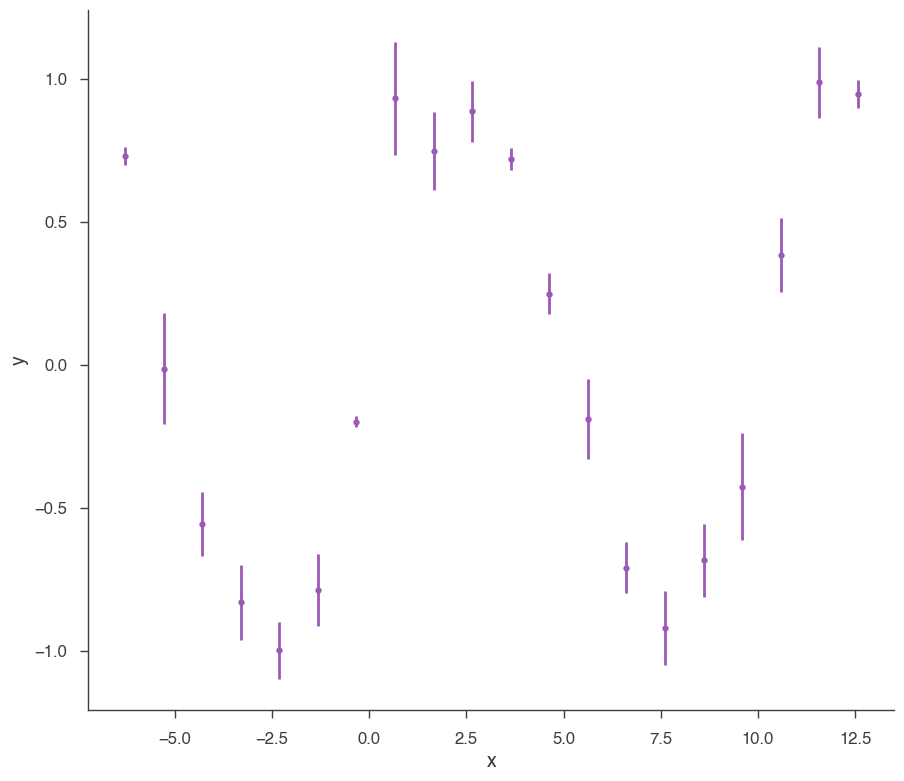

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

06:54:09 INFO      sampler set to emcee                                                    ]8;id=786184;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=871787;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

06:54:13 INFO      Mean acceptance fraction: 0.7089000000000001                                ]8;id=923074;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=715191;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

06:54:14 INFO      fit restored to maximum of posterior                                         ]8;id=687293;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=362199;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=198141;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=950779;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.22 +0.25) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.002 -0.009 +0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.738049
total,-9.738049


Values of statistical measures:

,statistical measures
AIC,24.181981
BIC,25.467563
DIC,23.532461
PDIC,2.023610


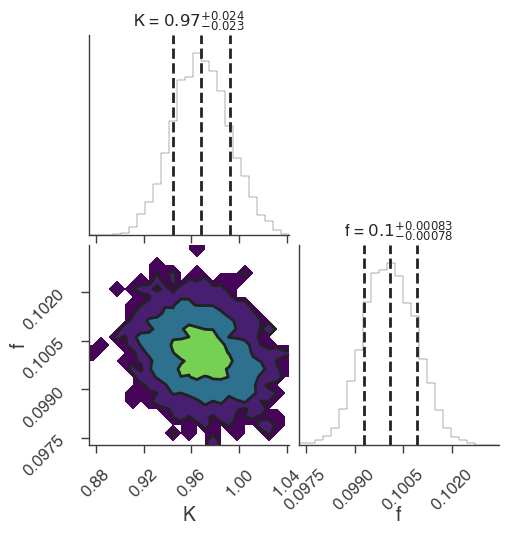

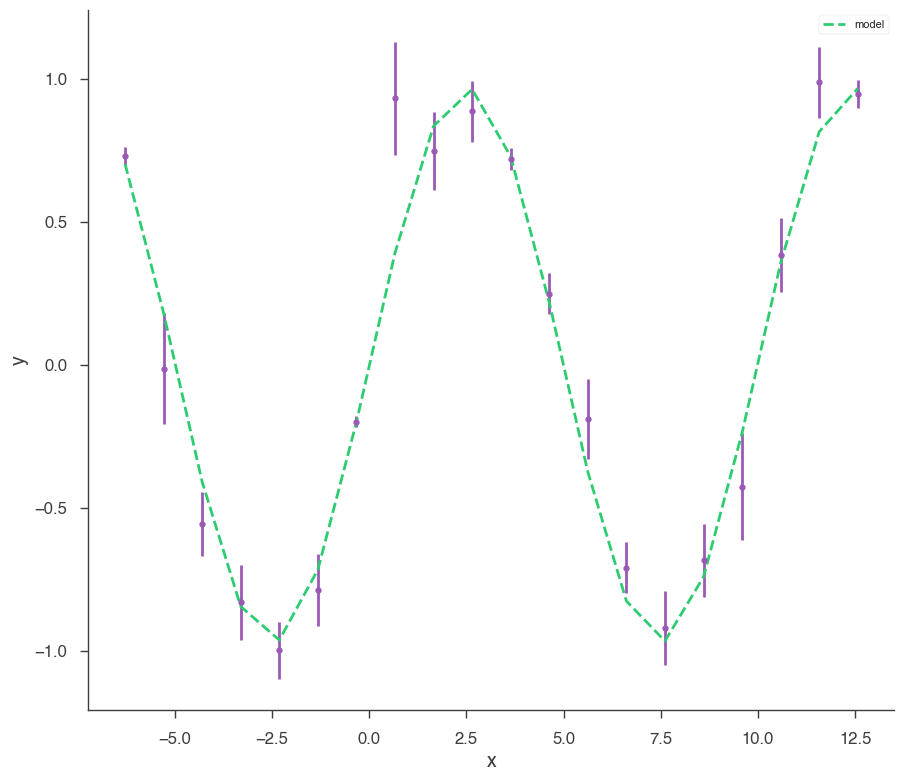

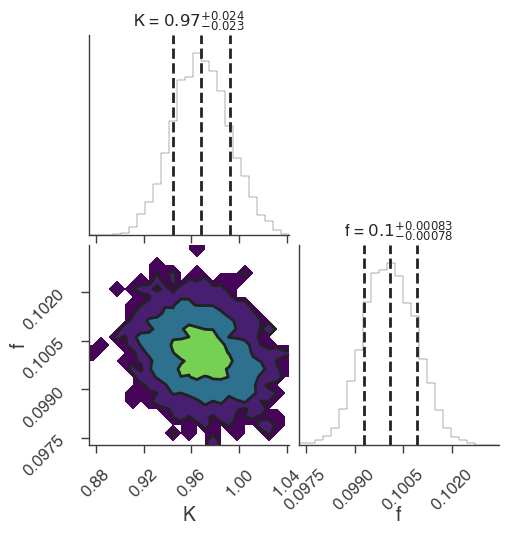

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

06:54:15 INFO      sampler set to multinest                                                ]8;id=825746;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=363663;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


 ln(ev)=  -18.001288423236023      +/-  0.13435119139039228     
 Total Likelihood Evaluations:         5682
 Sampling finished. Exiting MultiNest
  analysing data from chains/fit-.txt


06:54:17 INFO      fit restored to maximum of posterior                                         ]8;id=484409;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=842218;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=696725;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=551115;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.66 -0.22 +0.25) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.739043
total,-9.739043


Values of statistical measures:

,statistical measures
AIC,24.183968
BIC,25.469550
DIC,23.541349
PDIC,2.031619
log(Z),-7.817860


         INFO      deleting the chain directory chains                                     ]8;id=893137;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=47551;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

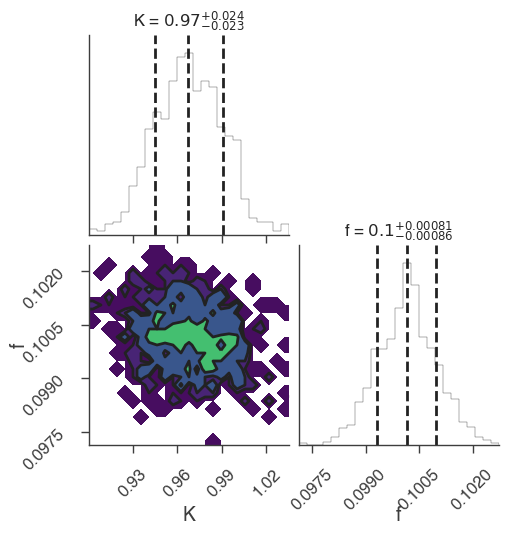

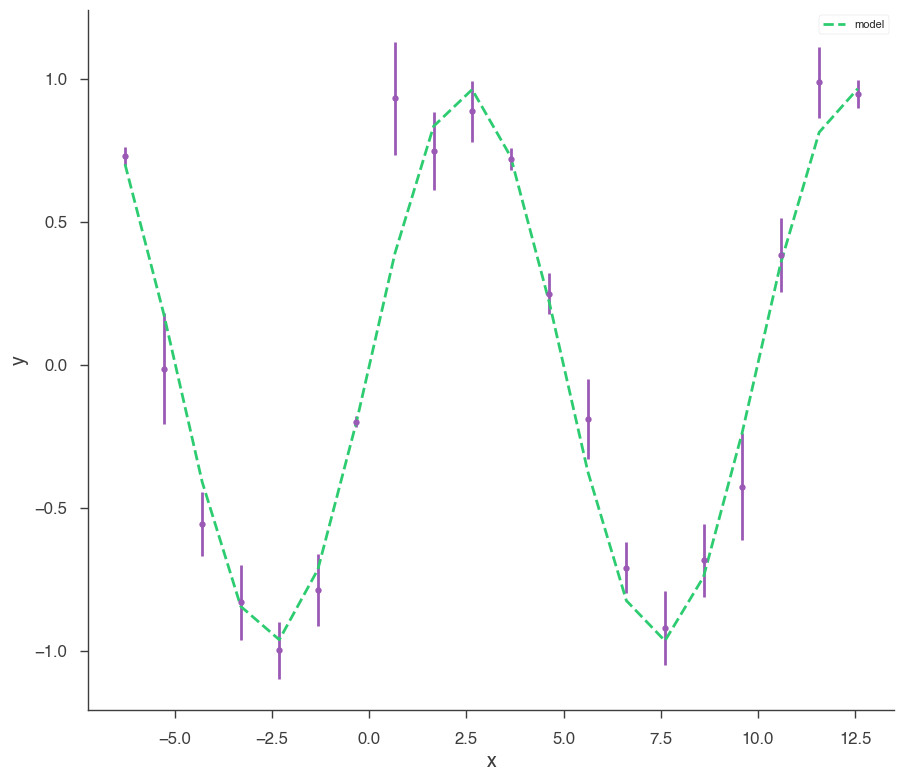

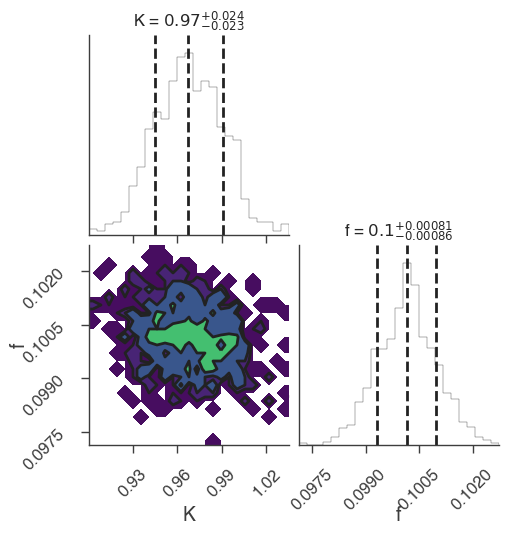

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

06:54:18 INFO      sampler set to dynesty_nested                                           ]8;id=495274;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=155465;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

147it [00:00, 1468.99it/s, bound: 0 | nc: 1 | ncall: 595 | eff(%): 24.706 | loglstar:   -inf < -2002.070 <    inf | logz: -2008.111 +/-  0.120 | dlogz: 1971.234 >  0.409]

294it [00:00, 1116.17it/s, bound: 0 | nc: 2 | ncall: 844 | eff(%): 34.834 | loglstar:   -inf < -1506.943 <    inf | logz: -1514.289 +/-  0.133 | dlogz: 1479.294 >  0.409]

411it [00:00, 922.96it/s, bound: 0 | nc: 2 | ncall: 1112 | eff(%): 36.960 | loglstar:   -inf < -1276.982 <    inf | logz: -1283.667 +/-  0.121 | dlogz: 1266.194 >  0.409]

508it [00:00, 866.78it/s, bound: 0 | nc: 1 | ncall: 1391 | eff(%): 36.520 | loglstar:   -inf < -1120.507 <    inf | logz: -1127.202 +/-  0.117 | dlogz: 1109.171 >  0.409]

597it [00:00, 726.77it/s, bound: 0 | nc: 3 | ncall: 1738 | eff(%): 34.350 | loglstar:   -inf < -1010.272 <    inf | logz: -1017.475 +/-  0.130 | dlogz: 1006.664 >  0.409]

673it [00:00, 636.09it/s, bound: 0 | nc: 7 | ncall: 2137 | eff(%): 31.493 | loglstar:   -inf < -946.244 <    inf | logz: -952.748 +/-  0.121 | dlogz: 941.056 >  0.409]   

740it [00:00, 600.64it/s, bound: 0 | nc: 11 | ncall: 2471 | eff(%): 29.947 | loglstar:   -inf < -917.694 <    inf | logz: -923.998 +/-  0.119 | dlogz: 912.032 >  0.409]

802it [00:01, 544.65it/s, bound: 0 | nc: 1 | ncall: 2826 | eff(%): 28.379 | loglstar:   -inf < -858.743 <    inf | logz: -865.759 +/-  0.128 | dlogz: 853.792 >  0.409] 

858it [00:01, 486.84it/s, bound: 0 | nc: 17 | ncall: 3186 | eff(%): 26.930 | loglstar:   -inf < -803.126 <    inf | logz: -811.585 +/-  0.139 | dlogz: 800.647 >  0.409]

908it [00:01, 419.77it/s, bound: 0 | nc: 7 | ncall: 3618 | eff(%): 25.097 | loglstar:   -inf < -758.948 <    inf | logz: -767.345 +/-  0.135 | dlogz: 755.865 >  0.409] 

952it [00:01, 359.56it/s, bound: 0 | nc: 5 | ncall: 4097 | eff(%): 23.237 | loglstar:   -inf < -729.169 <    inf | logz: -737.991 +/-  0.141 | dlogz: 727.011 >  0.409]

990it [00:01, 304.75it/s, bound: 0 | nc: 18 | ncall: 4562 | eff(%): 21.701 | loglstar:   -inf < -683.162 <    inf | logz: -692.259 +/-  0.149 | dlogz: 682.565 >  0.409]

1023it [00:02, 260.11it/s, bound: 0 | nc: 5 | ncall: 4989 | eff(%): 20.505 | loglstar:   -inf < -568.196 <    inf | logz: -577.421 +/-  0.151 | dlogz: 569.466 >  0.409]

1051it [00:02, 240.45it/s, bound: 0 | nc: 13 | ncall: 5351 | eff(%): 19.641 | loglstar:   -inf < -492.073 <    inf | logz: -500.845 +/-  0.144 | dlogz: 489.425 >  0.409]

1076it [00:02, 226.27it/s, bound: 0 | nc: 10 | ncall: 5637 | eff(%): 19.088 | loglstar:   -inf < -444.840 <    inf | logz: -453.946 +/-  0.144 | dlogz: 442.559 >  0.409]

1099it [00:02, 219.50it/s, bound: 0 | nc: 9 | ncall: 5881 | eff(%): 18.687 | loglstar:   -inf < -409.754 <    inf | logz: -417.504 +/-  0.137 | dlogz: 404.867 >  0.409] 

1121it [00:02, 204.11it/s, bound: 0 | nc: 12 | ncall: 6158 | eff(%): 18.204 | loglstar:   -inf < -378.273 <    inf | logz: -386.375 +/-  0.138 | dlogz: 373.866 >  0.409]

1142it [00:02, 182.04it/s, bound: 0 | nc: 7 | ncall: 6486 | eff(%): 17.607 | loglstar:   -inf < -343.513 <    inf | logz: -352.718 +/-  0.144 | dlogz: 341.030 >  0.409] 

1161it [00:02, 161.96it/s, bound: 0 | nc: 7 | ncall: 6841 | eff(%): 16.971 | loglstar:   -inf < -315.206 <    inf | logz: -324.285 +/-  0.144 | dlogz: 312.255 >  0.409]

1178it [00:03, 150.25it/s, bound: 0 | nc: 5 | ncall: 7144 | eff(%): 16.489 | loglstar:   -inf < -296.704 <    inf | logz: -305.165 +/-  0.141 | dlogz: 292.715 >  0.409]

1196it [00:03, 154.34it/s, bound: 0 | nc: 24 | ncall: 7367 | eff(%): 16.235 | loglstar:   -inf < -278.354 <    inf | logz: -287.068 +/-  0.142 | dlogz: 274.525 >  0.409]

1212it [00:03, 145.87it/s, bound: 0 | nc: 9 | ncall: 7745 | eff(%): 15.649 | loglstar:   -inf < -266.356 <    inf | logz: -274.803 +/-  0.141 | dlogz: 262.095 >  0.409] 

1227it [00:03, 141.20it/s, bound: 0 | nc: 14 | ncall: 8027 | eff(%): 15.286 | loglstar:   -inf < -254.033 <    inf | logz: -261.722 +/-  0.133 | dlogz: 248.568 >  0.409]

1242it [00:03, 132.50it/s, bound: 0 | nc: 4 | ncall: 8344 | eff(%): 14.885 | loglstar:   -inf < -243.077 <    inf | logz: -252.173 +/-  0.142 | dlogz: 239.702 >  0.409] 

1256it [00:03, 123.78it/s, bound: 0 | nc: 40 | ncall: 8698 | eff(%): 14.440 | loglstar:   -inf < -232.999 <    inf | logz: -241.696 +/-  0.143 | dlogz: 229.086 >  0.409]

1269it [00:03, 110.81it/s, bound: 0 | nc: 35 | ncall: 9072 | eff(%): 13.988 | loglstar:   -inf < -222.692 <    inf | logz: -231.625 +/-  0.144 | dlogz: 219.090 >  0.409]

1281it [00:03, 109.76it/s, bound: 0 | nc: 88 | ncall: 9316 | eff(%): 13.751 | loglstar:   -inf < -214.193 <    inf | logz: -222.653 +/-  0.138 | dlogz: 209.624 >  0.409]

1296it [00:04, 118.14it/s, bound: 0 | nc: 20 | ncall: 9552 | eff(%): 13.568 | loglstar:   -inf < -205.508 <    inf | logz: -213.439 +/-  0.136 | dlogz: 200.159 >  0.409]

1309it [00:04, 95.51it/s, bound: 0 | nc: 17 | ncall: 9997 | eff(%): 13.094 | loglstar:   -inf < -200.236 <    inf | logz: -208.380 +/-  0.136 | dlogz: 195.110 >  0.409] 

1320it [00:04, 91.55it/s, bound: 0 | nc: 58 | ncall: 10290 | eff(%): 12.828 | loglstar:   -inf < -192.922 <    inf | logz: -201.937 +/-  0.145 | dlogz: 189.305 >  0.409]

1330it [00:04, 90.83it/s, bound: 0 | nc: 9 | ncall: 10533 | eff(%): 12.627 | loglstar:   -inf < -189.813 <    inf | logz: -197.747 +/-  0.135 | dlogz: 184.346 >  0.409] 

1340it [00:04, 84.64it/s, bound: 0 | nc: 25 | ncall: 10840 | eff(%): 12.362 | loglstar:   -inf < -185.883 <    inf | logz: -193.961 +/-  0.135 | dlogz: 180.570 >  0.409]

1354it [00:04, 95.23it/s, bound: 0 | nc: 69 | ncall: 11101 | eff(%): 12.197 | loglstar:   -inf < -181.548 <    inf | logz: -189.872 +/-  0.136 | dlogz: 176.503 >  0.409]

1364it [00:04, 83.19it/s, bound: 0 | nc: 19 | ncall: 11454 | eff(%): 11.909 | loglstar:   -inf < -177.868 <    inf | logz: -186.102 +/-  0.136 | dlogz: 172.646 >  0.409]

1373it [00:05, 81.72it/s, bound: 0 | nc: 6 | ncall: 11790 | eff(%): 11.645 | loglstar:   -inf < -176.134 <    inf | logz: -183.953 +/-  0.132 | dlogz: 170.365 >  0.409] 

1384it [00:05, 85.65it/s, bound: 0 | nc: 42 | ncall: 12092 | eff(%): 11.446 | loglstar:   -inf < -169.364 <    inf | logz: -178.314 +/-  0.142 | dlogz: 165.245 >  0.409]

1393it [00:05, 83.11it/s, bound: 0 | nc: 4 | ncall: 12398 | eff(%): 11.236 | loglstar:   -inf < -164.327 <    inf | logz: -172.914 +/-  0.139 | dlogz: 159.466 >  0.409] 

1402it [00:05, 81.26it/s, bound: 0 | nc: 15 | ncall: 12724 | eff(%): 11.019 | loglstar:   -inf < -161.971 <    inf | logz: -169.804 +/-  0.135 | dlogz: 156.147 >  0.409]

1414it [00:05, 84.32it/s, bound: 0 | nc: 145 | ncall: 13066 | eff(%): 10.822 | loglstar:   -inf < -157.242 <    inf | logz: -165.761 +/-  0.139 | dlogz: 152.262 >  0.409]

1423it [00:05, 82.23it/s, bound: 0 | nc: 8 | ncall: 13319 | eff(%): 10.684 | loglstar:   -inf < -155.373 <    inf | logz: -163.365 +/-  0.134 | dlogz: 149.652 >  0.409]  

1432it [00:05, 79.49it/s, bound: 0 | nc: 13 | ncall: 13587 | eff(%): 10.539 | loglstar:   -inf < -151.821 <    inf | logz: -160.251 +/-  0.138 | dlogz: 146.676 >  0.409]

1440it [00:05, 78.00it/s, bound: 0 | nc: 53 | ncall: 13821 | eff(%): 10.419 | loglstar:   -inf < -150.575 <    inf | logz: -158.271 +/-  0.134 | dlogz: 144.480 >  0.409]

1450it [00:05, 81.03it/s, bound: 0 | nc: 85 | ncall: 14062 | eff(%): 10.311 | loglstar:   -inf < -147.920 <    inf | logz: -156.523 +/-  0.133 | dlogz: 142.837 >  0.409]

1459it [00:06, 75.78it/s, bound: 0 | nc: 10 | ncall: 14390 | eff(%): 10.139 | loglstar:   -inf < -145.491 <    inf | logz: -153.720 +/-  0.136 | dlogz: 139.971 >  0.409]

1467it [00:06, 72.78it/s, bound: 0 | nc: 1 | ncall: 14654 | eff(%): 10.011 | loglstar:   -inf < -141.558 <    inf | logz: -150.443 +/-  0.141 | dlogz: 136.885 >  0.409] 

1475it [00:06, 53.79it/s, bound: 1 | nc: 1 | ncall: 14709 | eff(%): 10.028 | loglstar:   -inf < -138.530 <    inf | logz: -147.038 +/-  0.138 | dlogz: 133.300 >  0.409]

1573it [00:06, 248.70it/s, bound: 1 | nc: 1 | ncall: 14842 | eff(%): 10.598 | loglstar:   -inf < -112.750 <    inf | logz: -121.081 +/-  0.135 | dlogz: 107.241 >  0.409]

1680it [00:06, 438.49it/s, bound: 1 | nc: 1 | ncall: 15025 | eff(%): 11.181 | loglstar:   -inf < -89.664 <    inf | logz: -97.854 +/-  0.136 | dlogz: 83.686 >  0.409]   

1786it [00:06, 590.61it/s, bound: 1 | nc: 4 | ncall: 15231 | eff(%): 11.726 | loglstar:   -inf < -72.385 <    inf | logz: -81.123 +/-  0.140 | dlogz: 66.727 >  0.409]

1857it [00:07, 445.87it/s, bound: 2 | nc: 1 | ncall: 15346 | eff(%): 12.101 | loglstar:   -inf < -61.689 <    inf | logz: -70.289 +/-  0.139 | dlogz: 55.674 >  0.409]

1968it [00:07, 585.76it/s, bound: 2 | nc: 2 | ncall: 15499 | eff(%): 12.698 | loglstar:   -inf < -48.710 <    inf | logz: -57.071 +/-  0.137 | dlogz: 42.305 >  0.409]

2060it [00:07, 662.35it/s, bound: 2 | nc: 4 | ncall: 15653 | eff(%): 13.160 | loglstar:   -inf < -40.896 <    inf | logz: -49.380 +/-  0.137 | dlogz: 34.375 >  0.409]

2139it [00:07, 687.55it/s, bound: 2 | nc: 1 | ncall: 15827 | eff(%): 13.515 | loglstar:   -inf < -35.703 <    inf | logz: -44.280 +/-  0.137 | dlogz: 29.133 >  0.409]

2218it [00:07, 485.26it/s, bound: 3 | nc: 2 | ncall: 15962 | eff(%): 13.896 | loglstar:   -inf < -31.607 <    inf | logz: -40.026 +/-  0.137 | dlogz: 24.744 >  0.409]

2330it [00:07, 613.06it/s, bound: 3 | nc: 1 | ncall: 16129 | eff(%): 14.446 | loglstar:   -inf < -26.101 <    inf | logz: -34.850 +/-  0.139 | dlogz: 19.291 >  0.409]

2413it [00:07, 661.36it/s, bound: 3 | nc: 1 | ncall: 16290 | eff(%): 14.813 | loglstar:   -inf < -23.187 <    inf | logz: -31.667 +/-  0.138 | dlogz: 15.882 >  0.409]

2493it [00:08, 431.48it/s, bound: 4 | nc: 1 | ncall: 16510 | eff(%): 15.100 | loglstar:   -inf < -20.811 <    inf | logz: -29.395 +/-  0.137 | dlogz: 13.408 >  0.409]

2622it [00:08, 582.56it/s, bound: 4 | nc: 5 | ncall: 16680 | eff(%): 15.719 | loglstar:   -inf < -17.973 <    inf | logz: -26.634 +/-  0.137 | dlogz: 10.319 >  0.409]

2708it [00:08, 638.03it/s, bound: 4 | nc: 1 | ncall: 16839 | eff(%): 16.082 | loglstar:   -inf < -16.481 <    inf | logz: -25.104 +/-  0.138 | dlogz:  8.569 >  0.409]

2816it [00:08, 736.10it/s, bound: 4 | nc: 1 | ncall: 17037 | eff(%): 16.529 | loglstar:   -inf < -15.076 <    inf | logz: -23.669 +/-  0.138 | dlogz:  6.862 >  0.409]

2907it [00:08, 554.18it/s, bound: 5 | nc: 1 | ncall: 17168 | eff(%): 16.933 | loglstar:   -inf < -13.850 <    inf | logz: -22.618 +/-  0.138 | dlogz:  5.586 >  0.409]

3007it [00:08, 641.64it/s, bound: 5 | nc: 1 | ncall: 17328 | eff(%): 17.353 | loglstar:   -inf < -12.864 <    inf | logz: -21.604 +/-  0.139 | dlogz:  4.329 >  0.409]

3107it [00:08, 720.29it/s, bound: 5 | nc: 4 | ncall: 17511 | eff(%): 17.743 | loglstar:   -inf < -12.109 <    inf | logz: -20.854 +/-  0.139 | dlogz:  3.349 >  0.409]

3194it [00:09, 529.73it/s, bound: 6 | nc: 1 | ncall: 17719 | eff(%): 18.026 | loglstar:   -inf < -11.633 <    inf | logz: -20.345 +/-  0.139 | dlogz:  2.659 >  0.409]

3298it [00:09, 627.79it/s, bound: 6 | nc: 2 | ncall: 17854 | eff(%): 18.472 | loglstar:   -inf < -11.171 <    inf | logz: -19.867 +/-  0.139 | dlogz:  2.010 >  0.409]

3401it [00:09, 714.00it/s, bound: 6 | nc: 1 | ncall: 18020 | eff(%): 18.873 | loglstar:   -inf < -10.884 <    inf | logz: -19.522 +/-  0.139 | dlogz:  1.512 >  0.409]

3488it [00:09, 721.13it/s, bound: 6 | nc: 6 | ncall: 18220 | eff(%): 19.144 | loglstar:   -inf < -10.674 <    inf | logz: -19.298 +/-  0.139 | dlogz:  1.186 >  0.409]

3572it [00:09, 512.77it/s, bound: 7 | nc: 1 | ncall: 18363 | eff(%): 19.452 | loglstar:   -inf < -10.493 <    inf | logz: -19.124 +/-  0.138 | dlogz:  0.936 >  0.409]

3673it [00:09, 608.30it/s, bound: 7 | nc: 3 | ncall: 18498 | eff(%): 19.856 | loglstar:   -inf < -10.345 <    inf | logz: -18.959 +/-  0.138 | dlogz:  0.703 >  0.409]

3762it [00:10, 668.06it/s, bound: 7 | nc: 1 | ncall: 18641 | eff(%): 20.181 | loglstar:   -inf < -10.217 <    inf | logz: -18.844 +/-  0.138 | dlogz:  0.547 >  0.409]

3843it [00:10, 682.16it/s, bound: 7 | nc: 1 | ncall: 18815 | eff(%): 20.425 | loglstar:   -inf < -10.143 <    inf | logz: -18.759 +/-  0.138 | dlogz:  0.436 >  0.409]

3866it [00:10, 378.06it/s, +400 | bound: 7 | nc: 1 | ncall: 19266 | eff(%): 22.612 | loglstar:   -inf < -9.771 <    inf | logz: -18.389 +/-  0.138 | dlogz:  0.001 >  0.409]

06:54:28 INFO      fit restored to maximum of posterior                                         ]8;id=865420;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=368117;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=329371;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=491532;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.23 +0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.002 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.738159
total,-9.738159


Values of statistical measures:

,statistical measures
AIC,24.182199
BIC,25.467782
DIC,23.362958
PDIC,1.942494
log(Z),-7.986032


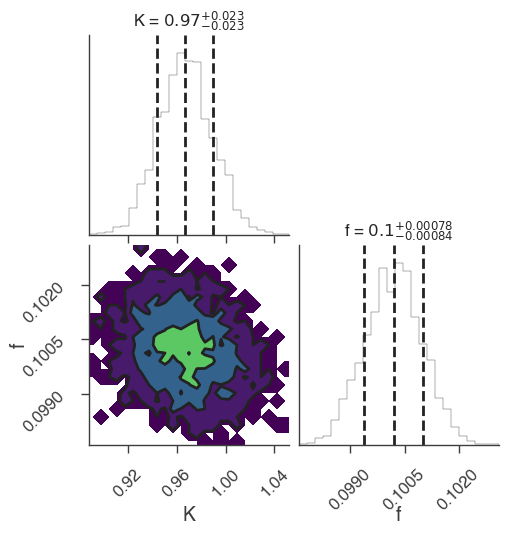

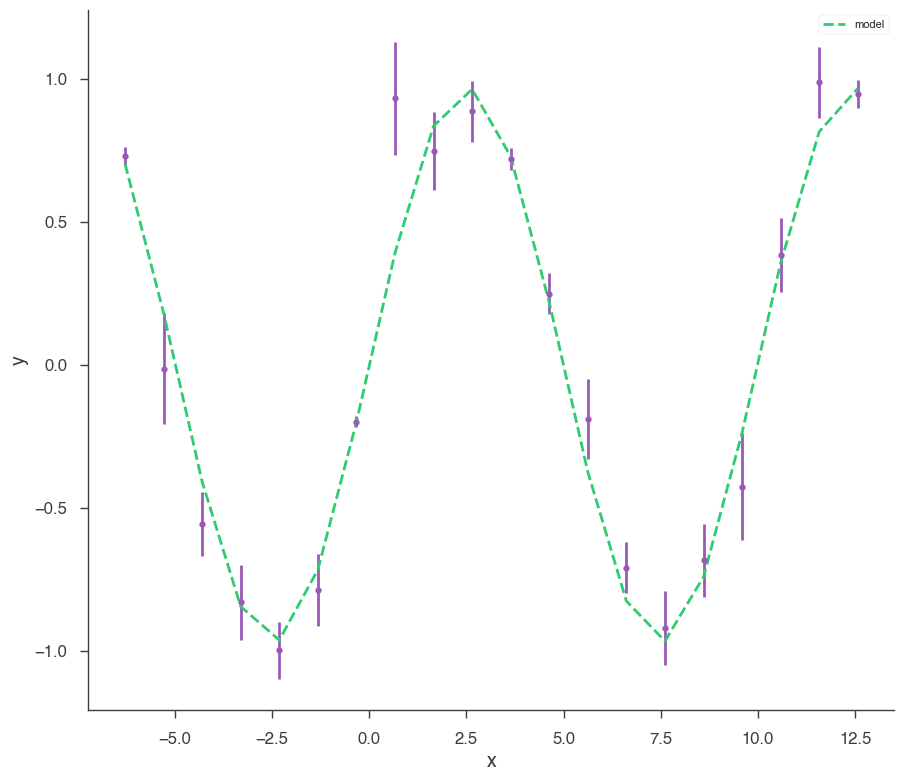

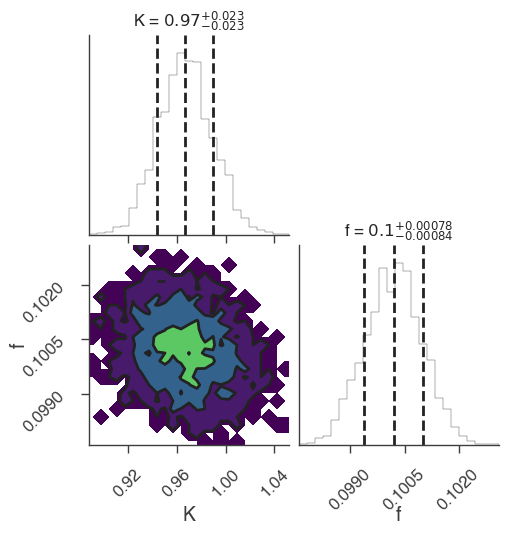

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

06:54:29 INFO      sampler set to dynesty_dynamic                                          ]8;id=962159;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=269584;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

10it [00:00, 99.81it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 10 | eff(%):  1.961 | loglstar:   -inf < -4371.315 <    inf | logz: -4378.243 +/-  0.118 | dlogz: 4460.133 >  0.010]

142it [00:00, 816.37it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 161 | eff(%): 21.483 | loglstar:   -inf < -2256.735 <    inf | logz: -2263.910 +/-  0.119 | dlogz: 2253.006 >  0.010]

247it [00:00, 922.67it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 314 | eff(%): 30.344 | loglstar:   -inf < -1774.570 <    inf | logz: -1781.936 +/-  0.120 | dlogz: 1770.069 >  0.010]

340it [00:00, 907.13it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 480 | eff(%): 34.694 | loglstar:   -inf < -1551.645 <    inf | logz: -1559.058 +/-  0.118 | dlogz: 1545.376 >  0.010]

431it [00:00, 816.33it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 709 | eff(%): 35.649 | loglstar:   -inf < -1394.810 <    inf | logz: -1401.229 +/-  0.109 | dlogz: 1385.530 >  0.010]

514it [00:00, 792.88it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 896 | eff(%): 36.819 | loglstar:   -inf < -1287.483 <    inf | logz: -1295.214 +/-  0.121 | dlogz: 1281.130 >  0.010]

595it [00:00, 733.96it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1122 | eff(%): 36.683 | loglstar:   -inf < -1189.406 <    inf | logz: -1196.982 +/-  0.116 | dlogz: 1181.707 >  0.010]

670it [00:00, 685.27it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1351 | eff(%): 36.197 | loglstar:   -inf < -1105.318 <    inf | logz: -1113.401 +/-  0.124 | dlogz: 1099.117 >  0.010]

740it [00:01, 599.58it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1641 | eff(%): 34.563 | loglstar:   -inf < -1021.817 <    inf | logz: -1028.569 +/-  0.113 | dlogz: 1017.036 >  0.010]

802it [00:01, 553.40it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1896 | eff(%): 33.472 | loglstar:   -inf < -975.787 <    inf | logz: -983.315 +/-  0.116 | dlogz: 972.013 >  0.010]   

859it [00:01, 520.20it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 2154 | eff(%): 32.366 | loglstar:   -inf < -945.023 <    inf | logz: -951.900 +/-  0.109 | dlogz: 940.002 >  0.010]

912it [00:01, 454.73it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 2470 | eff(%): 30.707 | loglstar:   -inf < -920.112 <    inf | logz: -926.888 +/-  0.110 | dlogz: 914.850 >  0.010]

959it [00:01, 452.13it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 2765 | eff(%): 29.372 | loglstar:   -inf < -905.684 <    inf | logz: -912.719 +/-  0.112 | dlogz: 900.610 >  0.010] 

1006it [00:01, 412.50it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 3099 | eff(%): 27.952 | loglstar:   -inf < -866.096 <    inf | logz: -873.406 +/-  0.115 | dlogz: 861.358 >  0.010]

1049it [00:01, 364.69it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3497 | eff(%): 26.245 | loglstar:   -inf < -835.813 <    inf | logz: -843.929 +/-  0.125 | dlogz: 832.517 >  0.010]

1092it [00:02, 371.46it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 3777 | eff(%): 25.532 | loglstar:   -inf < -807.777 <    inf | logz: -816.488 +/-  0.125 | dlogz: 805.225 >  0.010]

1131it [00:02, 338.01it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 4112 | eff(%): 24.523 | loglstar:   -inf < -782.582 <    inf | logz: -790.519 +/-  0.121 | dlogz: 778.556 >  0.010] 

1166it [00:02, 306.93it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 4431 | eff(%): 23.646 | loglstar:   -inf < -761.259 <    inf | logz: -768.757 +/-  0.116 | dlogz: 756.242 >  0.010]

1198it [00:02, 277.93it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 4825 | eff(%): 22.498 | loglstar:   -inf < -740.792 <    inf | logz: -748.791 +/-  0.120 | dlogz: 736.438 >  0.010]

1234it [00:02, 294.76it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 5115 | eff(%): 21.977 | loglstar:   -inf < -713.424 <    inf | logz: -721.383 +/-  0.122 | dlogz: 709.021 >  0.010]

1265it [00:02, 287.33it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 5379 | eff(%): 21.517 | loglstar:   -inf < -684.935 <    inf | logz: -692.662 +/-  0.120 | dlogz: 680.055 >  0.010]

1296it [00:02, 287.95it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 5687 | eff(%): 20.947 | loglstar:   -inf < -605.140 <    inf | logz: -614.563 +/-  0.135 | dlogz: 604.495 >  0.010]

1326it [00:02, 277.06it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 5984 | eff(%): 20.450 | loglstar:   -inf < -535.873 <    inf | logz: -544.556 +/-  0.125 | dlogz: 532.174 >  0.010] 

1354it [00:03, 245.97it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 6332 | eff(%): 19.819 | loglstar:   -inf < -493.836 <    inf | logz: -503.091 +/-  0.130 | dlogz: 491.449 >  0.010]

1380it [00:03, 187.80it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 6822 | eff(%): 18.847 | loglstar:   -inf < -452.840 <    inf | logz: -461.859 +/-  0.128 | dlogz: 449.615 >  0.010]

1402it [00:03, 184.94it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 7184 | eff(%): 18.246 | loglstar:   -inf < -417.737 <    inf | logz: -426.117 +/-  0.123 | dlogz: 413.836 >  0.010] 

1423it [00:03, 181.65it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 7524 | eff(%): 17.734 | loglstar:   -inf < -386.665 <    inf | logz: -396.004 +/-  0.129 | dlogz: 384.381 >  0.010]

1443it [00:03, 182.36it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 7800 | eff(%): 17.386 | loglstar:   -inf < -351.875 <    inf | logz: -361.417 +/-  0.133 | dlogz: 350.215 >  0.010]

1462it [00:03, 174.90it/s, batch: 0 | bound: 0 | nc: 60 | ncall: 8122 | eff(%): 16.957 | loglstar:   -inf < -333.659 <    inf | logz: -342.158 +/-  0.127 | dlogz: 329.873 >  0.010]

1480it [00:03, 171.41it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 8373 | eff(%): 16.680 | loglstar:   -inf < -315.672 <    inf | logz: -324.159 +/-  0.125 | dlogz: 311.815 >  0.010]

1507it [00:03, 192.21it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 8696 | eff(%): 16.388 | loglstar:   -inf < -296.399 <    inf | logz: -304.765 +/-  0.123 | dlogz: 292.122 >  0.010]

1527it [00:04, 171.07it/s, batch: 0 | bound: 0 | nc: 59 | ncall: 9139 | eff(%): 15.842 | loglstar:   -inf < -279.669 <    inf | logz: -288.906 +/-  0.133 | dlogz: 277.133 >  0.010]

1545it [00:04, 173.24it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 9385 | eff(%): 15.630 | loglstar:   -inf < -268.489 <    inf | logz: -277.499 +/-  0.127 | dlogz: 265.196 >  0.010]

1563it [00:04, 159.39it/s, batch: 0 | bound: 0 | nc: 53 | ncall: 9674 | eff(%): 15.363 | loglstar:   -inf < -257.279 <    inf | logz: -266.929 +/-  0.132 | dlogz: 255.150 >  0.010]

1580it [00:04, 146.82it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 9978 | eff(%): 15.079 | loglstar:   -inf < -246.767 <    inf | logz: -255.296 +/-  0.124 | dlogz: 242.512 >  0.010] 

1596it [00:04, 149.73it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 10207 | eff(%): 14.906 | loglstar:   -inf < -240.112 <    inf | logz: -248.131 +/-  0.122 | dlogz: 235.152 >  0.010]

1612it [00:04, 127.05it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 10579 | eff(%): 14.550 | loglstar:   -inf < -230.713 <    inf | logz: -239.533 +/-  0.127 | dlogz: 226.790 >  0.010]

1626it [00:04, 105.52it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 11008 | eff(%): 14.129 | loglstar:   -inf < -220.942 <    inf | logz: -230.188 +/-  0.129 | dlogz: 217.719 >  0.010]

1638it [00:05, 99.85it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 11317 | eff(%): 13.861 | loglstar:   -inf < -213.079 <    inf | logz: -221.936 +/-  0.126 | dlogz: 209.134 >  0.010] 

1649it [00:05, 83.98it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 11750 | eff(%): 13.461 | loglstar:   -inf < -204.970 <    inf | logz: -213.564 +/-  0.128 | dlogz: 200.629 >  0.010]

1659it [00:05, 84.42it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 11997 | eff(%): 13.275 | loglstar:   -inf < -200.754 <    inf | logz: -209.497 +/-  0.124 | dlogz: 196.528 >  0.010]

1671it [00:05, 91.03it/s, batch: 0 | bound: 0 | nc: 42 | ncall: 12220 | eff(%): 13.137 | loglstar:   -inf < -197.050 <    inf | logz: -205.871 +/-  0.122 | dlogz: 192.878 >  0.010]

1685it [00:05, 98.48it/s, batch: 0 | bound: 0 | nc: 62 | ncall: 12516 | eff(%): 12.946 | loglstar:   -inf < -189.246 <    inf | logz: -197.569 +/-  0.125 | dlogz: 184.467 >  0.010]

1696it [00:05, 96.68it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 12773 | eff(%): 12.778 | loglstar:   -inf < -185.951 <    inf | logz: -194.335 +/-  0.121 | dlogz: 181.173 >  0.010] 

1706it [00:05, 74.12it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 13274 | eff(%): 12.386 | loglstar:   -inf < -182.357 <    inf | logz: -190.847 +/-  0.123 | dlogz: 177.772 >  0.010]

1715it [00:06, 71.65it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 13580 | eff(%): 12.180 | loglstar:   -inf < -180.381 <    inf | logz: -188.484 +/-  0.121 | dlogz: 175.254 >  0.010]

1723it [00:06, 68.83it/s, batch: 0 | bound: 0 | nc: 93 | ncall: 13867 | eff(%): 11.993 | loglstar:   -inf < -177.464 <    inf | logz: -186.229 +/-  0.122 | dlogz: 173.106 >  0.010]

1734it [00:06, 77.86it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 14088 | eff(%): 11.886 | loglstar:   -inf < -173.335 <    inf | logz: -182.138 +/-  0.125 | dlogz: 169.091 >  0.010]

1743it [00:06, 68.52it/s, batch: 0 | bound: 0 | nc: 50 | ncall: 14467 | eff(%): 11.646 | loglstar:   -inf < -168.793 <    inf | logz: -178.179 +/-  0.128 | dlogz: 165.289 >  0.010]

1751it [00:06, 65.91it/s, batch: 0 | bound: 0 | nc: 81 | ncall: 14784 | eff(%): 11.456 | loglstar:   -inf < -166.102 <    inf | logz: -174.762 +/-  0.125 | dlogz: 161.563 >  0.010]

1759it [00:06, 67.30it/s, batch: 0 | bound: 0 | nc: 47 | ncall: 15114 | eff(%): 11.266 | loglstar:   -inf < -162.851 <    inf | logz: -171.662 +/-  0.126 | dlogz: 158.572 >  0.010]

1769it [00:06, 72.89it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 15359 | eff(%): 11.155 | loglstar:   -inf < -160.231 <    inf | logz: -168.162 +/-  0.123 | dlogz: 154.757 >  0.010]

1777it [00:07, 67.66it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 15673 | eff(%): 10.987 | loglstar:   -inf < -156.621 <    inf | logz: -165.570 +/-  0.126 | dlogz: 152.490 >  0.010]

1793it [00:07, 88.35it/s, batch: 0 | bound: 0 | nc: 30 | ncall: 15997 | eff(%): 10.869 | loglstar:   -inf < -150.592 <    inf | logz: -159.420 +/-  0.126 | dlogz: 146.190 >  0.010]

1803it [00:07, 84.55it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 16385 | eff(%): 10.678 | loglstar:   -inf < -149.039 <    inf | logz: -157.126 +/-  0.121 | dlogz: 143.662 >  0.010]

1812it [00:07, 76.59it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 16774 | eff(%): 10.490 | loglstar:   -inf < -146.111 <    inf | logz: -154.345 +/-  0.123 | dlogz: 140.904 >  0.010]

1820it [00:07, 73.70it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 17031 | eff(%): 10.382 | loglstar:   -inf < -144.114 <    inf | logz: -152.430 +/-  0.122 | dlogz: 138.966 >  0.010] 

1828it [00:07, 65.43it/s, batch: 0 | bound: 0 | nc: 106 | ncall: 17510 | eff(%): 10.150 | loglstar:   -inf < -141.210 <    inf | logz: -149.957 +/-  0.124 | dlogz: 136.584 >  0.010]

1838it [00:07, 71.63it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 17750 | eff(%): 10.071 | loglstar:   -inf < -138.171 <    inf | logz: -147.296 +/-  0.124 | dlogz: 133.962 >  0.010] 

1846it [00:08, 46.55it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17948 | eff(%): 10.007 | loglstar:   -inf < -136.890 <    inf | logz: -145.199 +/-  0.122 | dlogz: 131.660 >  0.010] 

1950it [00:08, 227.58it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18083 | eff(%): 10.493 | loglstar:   -inf < -111.108 <    inf | logz: -119.296 +/-  0.122 | dlogz: 105.698 >  0.010]

2043it [00:08, 372.35it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18225 | eff(%): 10.911 | loglstar:   -inf < -91.613 <    inf | logz: -100.682 +/-  0.124 | dlogz: 87.023 >  0.010]  

2117it [00:08, 455.64it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18381 | eff(%): 11.212 | loglstar:   -inf < -78.686 <    inf | logz: -87.046 +/-  0.124 | dlogz: 73.089 >  0.010] 

2189it [00:08, 519.99it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18532 | eff(%): 11.502 | loglstar:   -inf < -69.110 <    inf | logz: -77.527 +/-  0.123 | dlogz: 63.417 >  0.010]

2252it [00:08, 330.38it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18715 | eff(%): 11.720 | loglstar:   -inf < -62.307 <    inf | logz: -70.583 +/-  0.121 | dlogz: 56.319 >  0.010]

2364it [00:09, 474.30it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18866 | eff(%): 12.207 | loglstar:   -inf < -52.101 <    inf | logz: -60.497 +/-  0.121 | dlogz: 46.000 >  0.010]

2468it [00:09, 590.19it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19034 | eff(%): 12.634 | loglstar:   -inf < -45.022 <    inf | logz: -53.485 +/-  0.121 | dlogz: 38.767 >  0.010]

2565it [00:09, 674.68it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 19236 | eff(%): 12.997 | loglstar:   -inf < -38.132 <    inf | logz: -46.592 +/-  0.123 | dlogz: 31.669 >  0.010]

2649it [00:09, 685.61it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19431 | eff(%): 13.291 | loglstar:   -inf < -34.306 <    inf | logz: -42.616 +/-  0.121 | dlogz: 27.509 >  0.010]

2730it [00:09, 470.23it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19547 | eff(%): 13.618 | loglstar:   -inf < -30.231 <    inf | logz: -38.836 +/-  0.123 | dlogz: 23.584 >  0.010]

2821it [00:09, 553.23it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19687 | eff(%): 13.974 | loglstar:   -inf < -26.978 <    inf | logz: -35.358 +/-  0.122 | dlogz: 19.910 >  0.010]

2926it [00:09, 658.63it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19872 | eff(%): 14.363 | loglstar:   -inf < -23.691 <    inf | logz: -32.006 +/-  0.122 | dlogz: 16.356 >  0.010]

3022it [00:09, 728.29it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20080 | eff(%): 14.684 | loglstar:   -inf < -21.250 <    inf | logz: -29.745 +/-  0.122 | dlogz: 13.903 >  0.010]

3108it [00:10, 499.08it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20242 | eff(%): 14.984 | loglstar:   -inf < -19.592 <    inf | logz: -27.973 +/-  0.122 | dlogz: 11.997 >  0.010]

3222it [00:10, 620.13it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20383 | eff(%): 15.429 | loglstar:   -inf < -17.477 <    inf | logz: -25.946 +/-  0.122 | dlogz:  9.741 >  0.010]

3330it [00:10, 717.22it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20558 | eff(%): 15.813 | loglstar:   -inf < -16.014 <    inf | logz: -24.537 +/-  0.122 | dlogz:  8.114 >  0.010]

3420it [00:10, 745.82it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20714 | eff(%): 16.121 | loglstar:   -inf < -15.026 <    inf | logz: -23.511 +/-  0.122 | dlogz:  6.906 >  0.010]

3508it [00:10, 723.44it/s, batch: 0 | bound: 4 | nc: 5 | ncall: 20920 | eff(%): 16.377 | loglstar:   -inf < -14.225 <    inf | logz: -22.682 +/-  0.122 | dlogz:  5.902 >  0.010]

3590it [00:11, 486.73it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21044 | eff(%): 16.664 | loglstar:   -inf < -13.499 <    inf | logz: -22.016 +/-  0.122 | dlogz:  5.074 >  0.010]

3684it [00:11, 570.93it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21182 | eff(%): 16.991 | loglstar:   -inf < -12.852 <    inf | logz: -21.366 +/-  0.122 | dlogz:  4.243 >  0.010]

3763it [00:11, 616.31it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 21330 | eff(%): 17.238 | loglstar:   -inf < -12.403 <    inf | logz: -20.900 +/-  0.122 | dlogz:  3.637 >  0.010]

3851it [00:11, 676.99it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21521 | eff(%): 17.488 | loglstar:   -inf < -11.858 <    inf | logz: -20.446 +/-  0.123 | dlogz:  3.030 >  0.010]

3930it [00:11, 442.87it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21721 | eff(%): 17.686 | loglstar:   -inf < -11.545 <    inf | logz: -20.099 +/-  0.123 | dlogz:  2.555 >  0.010]

4043it [00:11, 567.81it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21848 | eff(%): 18.091 | loglstar:   -inf < -11.214 <    inf | logz: -19.704 +/-  0.123 | dlogz:  2.000 >  0.010]

4139it [00:11, 648.43it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21985 | eff(%): 18.408 | loglstar:   -inf < -10.975 <    inf | logz: -19.442 +/-  0.123 | dlogz:  1.621 >  0.010]

4222it [00:11, 676.05it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22151 | eff(%): 18.639 | loglstar:   -inf < -10.765 <    inf | logz: -19.253 +/-  0.123 | dlogz:  1.349 >  0.010]

4303it [00:12, 702.52it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22337 | eff(%): 18.842 | loglstar:   -inf < -10.606 <    inf | logz: -19.095 +/-  0.122 | dlogz:  1.123 >  0.010]

4384it [00:12, 483.66it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22489 | eff(%): 19.070 | loglstar:   -inf < -10.484 <    inf | logz: -18.962 +/-  0.122 | dlogz:  0.933 >  0.010]

4498it [00:12, 611.17it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22629 | eff(%): 19.447 | loglstar:   -inf < -10.323 <    inf | logz: -18.807 +/-  0.122 | dlogz:  0.719 >  0.010]

4620it [00:12, 742.48it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 22821 | eff(%): 19.810 | loglstar:   -inf < -10.201 <    inf | logz: -18.677 +/-  0.122 | dlogz:  0.545 >  0.010]

4719it [00:12, 799.89it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 23009 | eff(%): 20.073 | loglstar:   -inf < -10.120 <    inf | logz: -18.593 +/-  0.122 | dlogz:  0.436 >  0.010]

4813it [00:12, 538.02it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23234 | eff(%): 20.279 | loglstar:   -inf < -10.059 <    inf | logz: -18.527 +/-  0.122 | dlogz:  0.353 >  0.010]

4950it [00:13, 693.72it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23413 | eff(%): 20.700 | loglstar:   -inf < -9.990 <    inf | logz: -18.451 +/-  0.122 | dlogz:  0.262 >  0.010] 

5043it [00:13, 736.76it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23562 | eff(%): 20.958 | loglstar:   -inf < -9.956 <    inf | logz: -18.411 +/-  0.122 | dlogz:  0.214 >  0.010]

5135it [00:13, 753.26it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23732 | eff(%): 21.191 | loglstar:   -inf < -9.926 <    inf | logz: -18.378 +/-  0.122 | dlogz:  0.176 >  0.010]

5226it [00:13, 791.11it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23936 | eff(%): 21.386 | loglstar:   -inf < -9.899 <    inf | logz: -18.350 +/-  0.122 | dlogz:  0.145 >  0.010]

5316it [00:13, 534.24it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24054 | eff(%): 21.650 | loglstar:   -inf < -9.878 <    inf | logz: -18.328 +/-  0.122 | dlogz:  0.120 >  0.010]

5423it [00:13, 637.13it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24208 | eff(%): 21.948 | loglstar:   -inf < -9.857 <    inf | logz: -18.306 +/-  0.122 | dlogz:  0.096 >  0.010]

5518it [00:13, 702.51it/s, batch: 0 | bound: 9 | nc: 6 | ncall: 24367 | eff(%): 22.190 | loglstar:   -inf < -9.839 <    inf | logz: -18.290 +/-  0.122 | dlogz:  0.079 >  0.010]

5613it [00:14, 759.80it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24575 | eff(%): 22.385 | loglstar:   -inf < -9.829 <    inf | logz: -18.277 +/-  0.122 | dlogz:  0.065 >  0.010]

5702it [00:14, 504.92it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24761 | eff(%): 22.572 | loglstar:   -inf < -9.819 <    inf | logz: -18.267 +/-  0.122 | dlogz:  0.054 >  0.010]

5820it [00:14, 629.45it/s, batch: 0 | bound: 10 | nc: 4 | ncall: 24913 | eff(%): 22.902 | loglstar:   -inf < -9.809 <    inf | logz: -18.256 +/-  0.122 | dlogz:  0.042 >  0.010]

5931it [00:14, 729.53it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25099 | eff(%): 23.169 | loglstar:   -inf < -9.801 <    inf | logz: -18.247 +/-  0.122 | dlogz:  0.034 >  0.010]

6023it [00:14, 726.82it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25315 | eff(%): 23.331 | loglstar:   -inf < -9.796 <    inf | logz: -18.242 +/-  0.122 | dlogz:  0.028 >  0.010]

6109it [00:15, 478.83it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25497 | eff(%): 23.499 | loglstar:   -inf < -9.791 <    inf | logz: -18.237 +/-  0.122 | dlogz:  0.024 >  0.010]

6247it [00:15, 637.13it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25677 | eff(%): 23.864 | loglstar:   -inf < -9.787 <    inf | logz: -18.232 +/-  0.122 | dlogz:  0.018 >  0.010]

6352it [00:15, 718.84it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25839 | eff(%): 24.116 | loglstar:   -inf < -9.784 <    inf | logz: -18.228 +/-  0.122 | dlogz:  0.014 >  0.010]

6446it [00:15, 766.69it/s, batch: 0 | bound: 11 | nc: 5 | ncall: 26034 | eff(%): 24.293 | loglstar:   -inf < -9.782 <    inf | logz: -18.226 +/-  0.122 | dlogz:  0.012 >  0.010]

6540it [00:15, 493.37it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26256 | eff(%): 24.449 | loglstar:   -inf < -9.780 <    inf | logz: -18.224 +/-  0.122 | dlogz:  0.010 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7034it [00:16, 597.82it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26750 | eff(%): 26.295 | loglstar: -11.647 < -11.434 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]        

7106it [00:17, 385.80it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26830 | eff(%): 25.932 | loglstar: -11.647 < -11.377 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7177it [00:17, 413.83it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 26931 | eff(%): 26.095 | loglstar: -11.647 < -11.183 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7245it [00:17, 443.01it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27034 | eff(%): 26.244 | loglstar: -11.647 < -10.954 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7308it [00:17, 467.84it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27152 | eff(%): 26.360 | loglstar: -11.647 < -10.780 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7371it [00:17, 493.79it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27265 | eff(%): 26.479 | loglstar: -11.647 < -10.661 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7433it [00:17, 510.95it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27408 | eff(%): 26.565 | loglstar: -11.647 < -10.560 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7494it [00:17, 356.15it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27530 | eff(%): 26.667 | loglstar: -11.647 < -10.472 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7568it [00:18, 419.99it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27625 | eff(%): 26.840 | loglstar: -11.647 < -10.356 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7642it [00:18, 480.71it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 27724 | eff(%): 27.007 | loglstar: -11.647 < -10.274 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]

7809it [00:18, 736.64it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27940 | eff(%): 27.515 | loglstar: -11.647 < -10.107 < -10.230 | logz: -18.214 +/-  0.126 | stop:  1.418]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8193it [00:19, 504.23it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28381 | eff(%): 28.868 | loglstar: -12.094 < -9.934 < -11.647 | logz: -18.202 +/-  0.102 | stop:  1.090] 

8271it [00:19, 347.84it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 28475 | eff(%): 28.496 | loglstar: -12.094 < -11.742 < -11.647 | logz: -18.202 +/-  0.102 | stop:  1.090]

8631it [00:19, 634.24it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 28879 | eff(%): 29.710 | loglstar: -12.094 < -10.350 < -11.647 | logz: -18.202 +/-  0.102 | stop:  1.090]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8794it [00:20, 463.21it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29051 | eff(%): 30.271 | loglstar: -12.094 < -9.773 < -11.647 | logz: -18.202 +/-  0.102 | stop:  0.941] 

8794it [00:20, 428.97it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29051 | eff(%): 30.271 | loglstar: -12.094 < -9.773 < -11.647 | logz: -18.202 +/-  0.102 | stop:  0.941]

06:54:51 INFO      fit restored to maximum of posterior                                         ]8;id=27671;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=2549;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=277744;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=669459;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 +/- 0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.001 -0.007 +0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.738072
total,-9.738072


Values of statistical measures:

,statistical measures
AIC,24.182026
BIC,25.467609
DIC,23.277741
PDIC,1.899339
log(Z),-7.909685


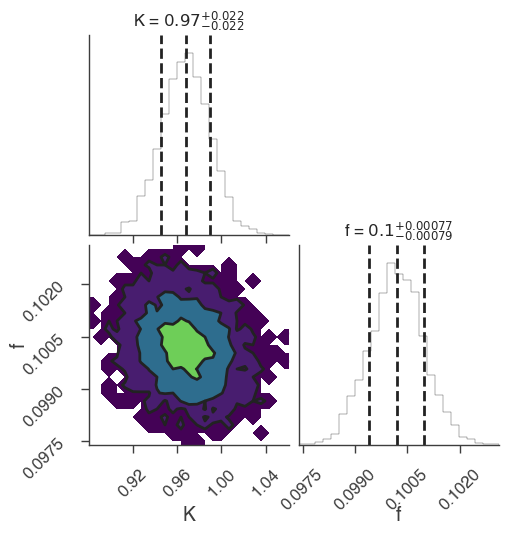

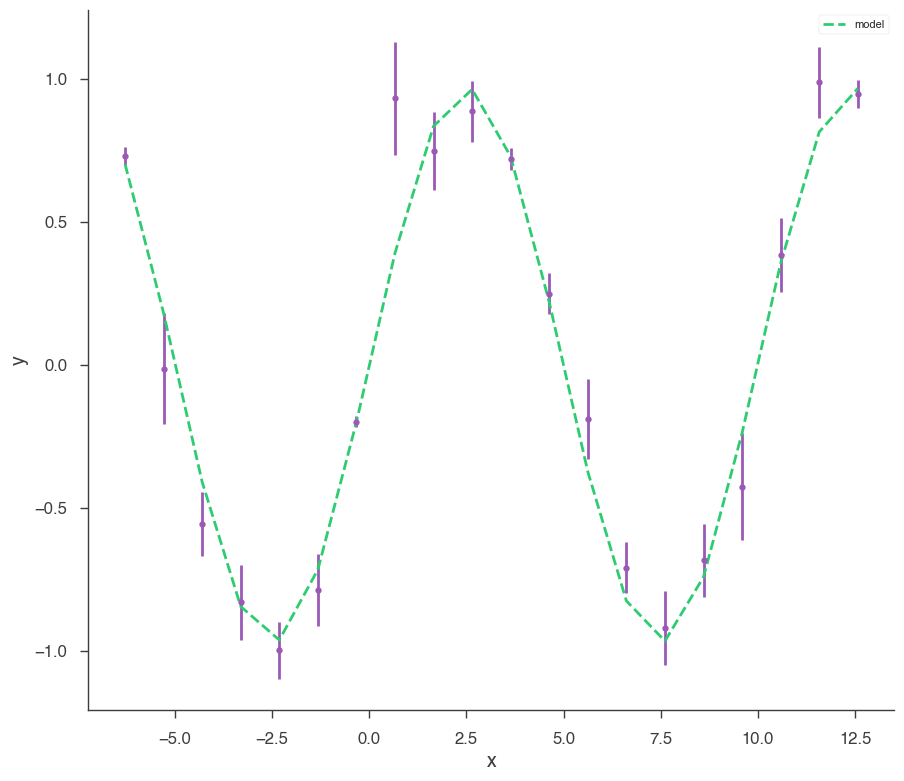

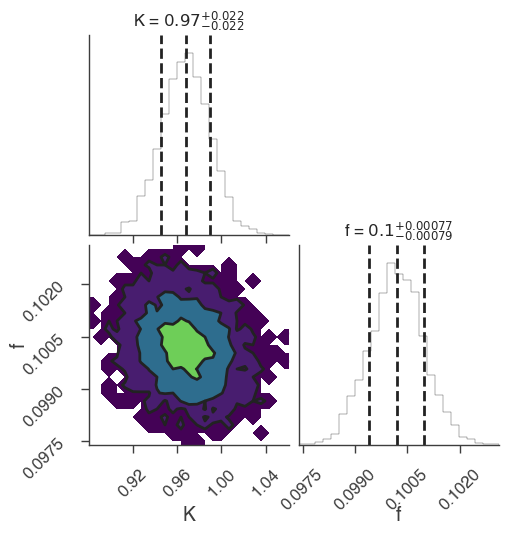

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=110672;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=429924;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:19, 31.64it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:19, 32.31it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:18, 33.60it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:17, 35.17it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:15, 37.80it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:16, 36.41it/s]

Sampling progress :   5%|▍         | 30/625 [00:00<00:15, 38.13it/s]

Sampling progress :   5%|▌         | 34/625 [00:00<00:15, 37.71it/s]

Sampling progress :   6%|▌         | 38/625 [00:01<00:16, 36.67it/s]

Sampling progress :   7%|▋         | 42/625 [00:01<00:15, 37.57it/s]

Sampling progress :   7%|▋         | 46/625 [00:01<00:15, 37.83it/s]

Sampling progress :   8%|▊         | 50/625 [00:01<00:15, 36.42it/s]

Sampling progress :   9%|▉         | 55/625 [00:01<00:15, 36.71it/s]

Sampling progress :   9%|▉         | 59/625 [00:01<00:15, 35.77it/s]

Sampling progress :  10%|█         | 63/625 [00:01<00:15, 35.14it/s]

Sampling progress :  11%|█         | 67/625 [00:01<00:16, 34.69it/s]

Sampling progress :  11%|█▏        | 71/625 [00:01<00:15, 35.48it/s]

Sampling progress :  12%|█▏        | 76/625 [00:02<00:14, 37.93it/s]

Sampling progress :  13%|█▎        | 80/625 [00:02<00:14, 37.75it/s]

Sampling progress :  13%|█▎        | 84/625 [00:02<00:14, 38.13it/s]

Sampling progress :  14%|█▍        | 89/625 [00:02<00:13, 39.32it/s]

Sampling progress :  15%|█▌        | 94/625 [00:02<00:13, 39.94it/s]

Sampling progress :  16%|█▌        | 98/625 [00:02<00:13, 39.05it/s]

Sampling progress :  16%|█▋        | 102/625 [00:02<00:13, 38.19it/s]

Sampling progress :  17%|█▋        | 106/625 [00:02<00:13, 37.27it/s]

Sampling progress :  18%|█▊        | 110/625 [00:02<00:14, 35.49it/s]

Sampling progress :  18%|█▊        | 114/625 [00:03<00:16, 30.34it/s]

Sampling progress :  19%|█▉        | 118/625 [00:03<00:16, 31.38it/s]

Sampling progress :  20%|█▉        | 122/625 [00:03<00:15, 31.85it/s]

Sampling progress :  20%|██        | 126/625 [00:03<00:15, 33.06it/s]

Sampling progress :  21%|██        | 130/625 [00:03<00:14, 34.16it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:14, 33.98it/s]

Sampling progress :  22%|██▏       | 138/625 [00:03<00:14, 33.29it/s]

Sampling progress :  23%|██▎       | 143/625 [00:03<00:13, 35.90it/s]

Sampling progress :  24%|██▎       | 147/625 [00:04<00:14, 34.04it/s]

Sampling progress :  24%|██▍       | 151/625 [00:04<00:14, 33.65it/s]

Sampling progress :  25%|██▍       | 155/625 [00:04<00:13, 33.70it/s]

Sampling progress :  25%|██▌       | 159/625 [00:04<00:13, 34.05it/s]

Sampling progress :  26%|██▌       | 163/625 [00:04<00:13, 34.32it/s]

Sampling progress :  27%|██▋       | 167/625 [00:04<00:13, 35.07it/s]

Sampling progress :  27%|██▋       | 171/625 [00:04<00:12, 35.39it/s]

Sampling progress :  28%|██▊       | 176/625 [00:04<00:12, 37.20it/s]

Sampling progress :  29%|██▉       | 180/625 [00:05<00:12, 36.12it/s]

Sampling progress :  30%|██▉       | 185/625 [00:05<00:11, 37.46it/s]

Sampling progress :  30%|███       | 190/625 [00:05<00:11, 39.08it/s]

Sampling progress :  31%|███       | 194/625 [00:05<00:11, 38.69it/s]

Sampling progress :  32%|███▏      | 198/625 [00:05<00:11, 37.94it/s]

Sampling progress :  32%|███▏      | 202/625 [00:05<00:11, 36.57it/s]

Sampling progress :  33%|███▎      | 206/625 [00:05<00:11, 36.03it/s]

Sampling progress :  34%|███▎      | 210/625 [00:05<00:11, 36.08it/s]

Sampling progress :  34%|███▍      | 214/625 [00:05<00:11, 35.75it/s]

Sampling progress :  35%|███▍      | 218/625 [00:06<00:11, 34.93it/s]

Sampling progress :  36%|███▌      | 222/625 [00:06<00:11, 35.29it/s]

Sampling progress :  36%|███▌      | 226/625 [00:06<00:11, 35.77it/s]

Sampling progress :  37%|███▋      | 230/625 [00:06<00:11, 35.70it/s]

Sampling progress :  37%|███▋      | 234/625 [00:06<00:10, 36.01it/s]

Sampling progress :  38%|███▊      | 238/625 [00:06<00:10, 36.12it/s]

Sampling progress :  39%|███▊      | 242/625 [00:06<00:10, 36.53it/s]

Sampling progress :  39%|███▉      | 246/625 [00:06<00:10, 36.09it/s]

Sampling progress :  40%|████      | 250/625 [00:06<00:10, 36.24it/s]

Sampling progress :  41%|████      | 254/625 [00:07<00:10, 34.98it/s]

Sampling progress :  41%|████▏     | 258/625 [00:07<00:10, 35.30it/s]

Sampling progress :  42%|████▏     | 262/625 [00:07<00:10, 35.63it/s]

Sampling progress :  43%|████▎     | 266/625 [00:07<00:10, 34.80it/s]

Sampling progress :  43%|████▎     | 270/625 [00:07<00:10, 34.77it/s]

Sampling progress :  44%|████▍     | 274/625 [00:07<00:10, 34.88it/s]

Sampling progress :  44%|████▍     | 278/625 [00:07<00:10, 34.50it/s]

Sampling progress :  45%|████▌     | 282/625 [00:07<00:09, 34.83it/s]

Sampling progress :  46%|████▌     | 286/625 [00:08<00:09, 34.93it/s]

Sampling progress :  46%|████▋     | 290/625 [00:08<00:09, 34.14it/s]

Sampling progress :  47%|████▋     | 294/625 [00:08<00:09, 35.60it/s]

Sampling progress :  48%|████▊     | 299/625 [00:08<00:08, 37.18it/s]

Sampling progress :  48%|████▊     | 303/625 [00:08<00:08, 36.91it/s]

Sampling progress :  49%|████▉     | 307/625 [00:08<00:08, 37.06it/s]

Sampling progress :  50%|████▉     | 312/625 [00:08<00:08, 38.53it/s]

Sampling progress :  51%|█████     | 316/625 [00:08<00:07, 38.66it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:08<00:07, 40.55it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:09<00:07, 39.42it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:09<00:07, 38.80it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:09<00:07, 38.35it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:09<00:07, 36.11it/s]

Sampling progress :  55%|█████▍    | 342/625 [00:09<00:07, 35.54it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:09<00:07, 37.60it/s]

Sampling progress :  56%|█████▌    | 351/625 [00:09<00:07, 36.90it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:09<00:07, 37.25it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:09<00:07, 36.23it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:10<00:07, 35.35it/s]

Sampling progress :  59%|█████▊    | 367/625 [00:10<00:07, 34.95it/s]

Sampling progress :  59%|█████▉    | 371/625 [00:10<00:07, 34.21it/s]

Sampling progress :  60%|██████    | 375/625 [00:10<00:07, 33.93it/s]

Sampling progress :  61%|██████    | 379/625 [00:10<00:07, 34.23it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:10<00:06, 34.73it/s]

Sampling progress :  62%|██████▏   | 387/625 [00:10<00:06, 34.85it/s]

Sampling progress :  63%|██████▎   | 391/625 [00:10<00:06, 34.46it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:11<00:06, 35.17it/s]

Sampling progress :  64%|██████▍   | 399/625 [00:11<00:06, 36.24it/s]

Sampling progress :  64%|██████▍   | 403/625 [00:11<00:06, 34.73it/s]

Sampling progress :  65%|██████▌   | 407/625 [00:11<00:06, 35.00it/s]

Sampling progress :  66%|██████▌   | 411/625 [00:11<00:06, 34.78it/s]

Sampling progress :  66%|██████▋   | 415/625 [00:11<00:06, 34.04it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:11<00:05, 35.55it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:11<00:05, 33.78it/s]

Sampling progress :  68%|██████▊   | 427/625 [00:11<00:05, 33.69it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:12<00:05, 34.73it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:12<00:05, 34.67it/s]

Sampling progress :  70%|███████   | 439/625 [00:12<00:05, 34.70it/s]

Sampling progress :  71%|███████   | 443/625 [00:12<00:05, 34.56it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:12<00:05, 34.72it/s]

Sampling progress :  72%|███████▏  | 451/625 [00:12<00:05, 34.75it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:12<00:04, 35.30it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:12<00:04, 35.00it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:12<00:04, 34.99it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:13<00:04, 35.09it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:13<00:04, 33.98it/s]

Sampling progress :  76%|███████▌  | 475/625 [00:13<00:04, 34.15it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:13<00:04, 34.02it/s]

Sampling progress :  77%|███████▋  | 483/625 [00:13<00:04, 34.25it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:13<00:04, 34.36it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:13<00:03, 34.07it/s]

Sampling progress :  79%|███████▉  | 495/625 [00:13<00:03, 34.48it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:14<00:03, 34.40it/s]

Sampling progress :  80%|████████  | 503/625 [00:14<00:03, 34.15it/s]

Sampling progress :  81%|████████  | 507/625 [00:14<00:03, 34.74it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:14<00:03, 34.18it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:14<00:03, 33.83it/s]

Sampling progress :  83%|████████▎ | 519/625 [00:14<00:03, 33.39it/s]

Sampling progress :  84%|████████▎ | 523/625 [00:14<00:02, 34.71it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:14<00:02, 35.55it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:14<00:02, 35.75it/s]

Sampling progress :  86%|████████▌ | 535/625 [00:15<00:02, 34.92it/s]

Sampling progress :  86%|████████▌ | 539/625 [00:15<00:02, 34.43it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:15<00:02, 35.23it/s]

Sampling progress :  88%|████████▊ | 547/625 [00:15<00:02, 34.54it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:15<00:02, 34.23it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:15<00:02, 33.33it/s]

Sampling progress :  89%|████████▉ | 559/625 [00:15<00:01, 34.04it/s]

Sampling progress :  90%|█████████ | 563/625 [00:15<00:01, 33.97it/s]

Sampling progress :  91%|█████████ | 567/625 [00:16<00:01, 33.51it/s]

Sampling progress :  91%|█████████▏| 571/625 [00:16<00:01, 33.78it/s]

Sampling progress :  92%|█████████▏| 575/625 [00:16<00:01, 34.06it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:16<00:01, 31.76it/s]

Sampling progress :  93%|█████████▎| 583/625 [00:16<00:01, 32.65it/s]

Sampling progress :  94%|█████████▍| 587/625 [00:16<00:01, 33.54it/s]

Sampling progress :  95%|█████████▍| 591/625 [00:16<00:01, 33.77it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:16<00:00, 34.24it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:16<00:00, 34.76it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:17<00:00, 35.41it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:17<00:00, 34.52it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:17<00:00, 34.22it/s]

Sampling progress :  98%|█████████▊| 615/625 [00:17<00:00, 34.67it/s]

Sampling progress :  99%|█████████▉| 619/625 [00:17<00:00, 34.16it/s]

Sampling progress : 100%|█████████▉| 624/625 [00:17<00:00, 36.60it/s]

Sampling progress : 100%|██████████| 625/625 [00:17<00:00, 35.36it/s]

06:55:10 INFO      fit restored to maximum of posterior                                         ]8;id=737922;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=987311;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=292287;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=521879;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 20


Scale Factor: 1.539615


Mean Integrated Autocorrelation Time: 3.08


Effective Sample Size: 4052.14


Number of Log Probability Evaluations: 65001


Effective Samples per Log Probability Evaluation: 0.06234


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 +/- 0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.002 +/- 0.008) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.737998
total,-9.737998


Values of statistical measures:

,statistical measures
AIC,24.181878
BIC,25.467460
DIC,23.397930
PDIC,1.960911


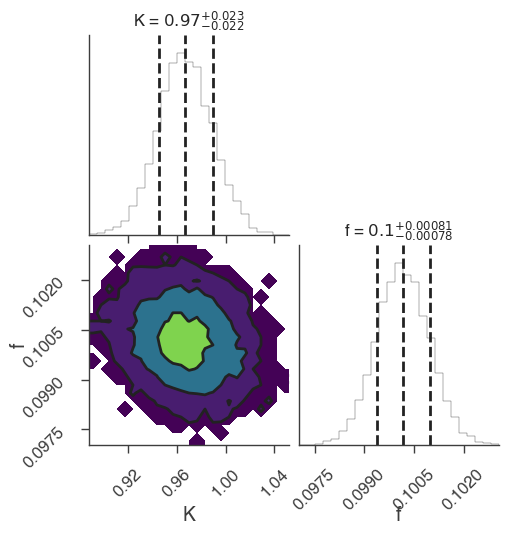

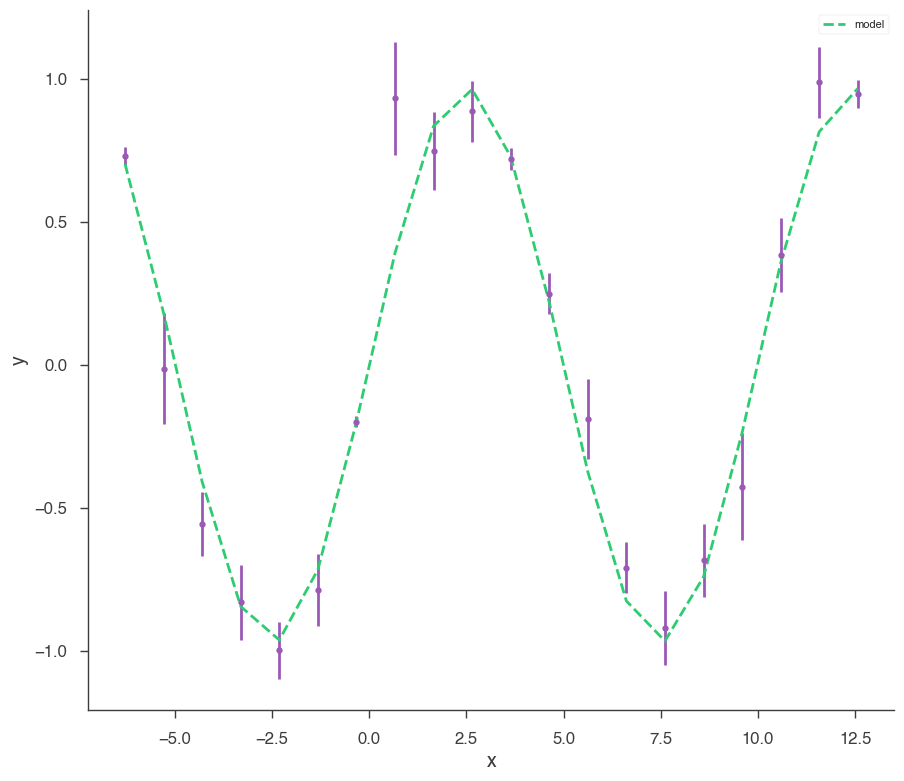

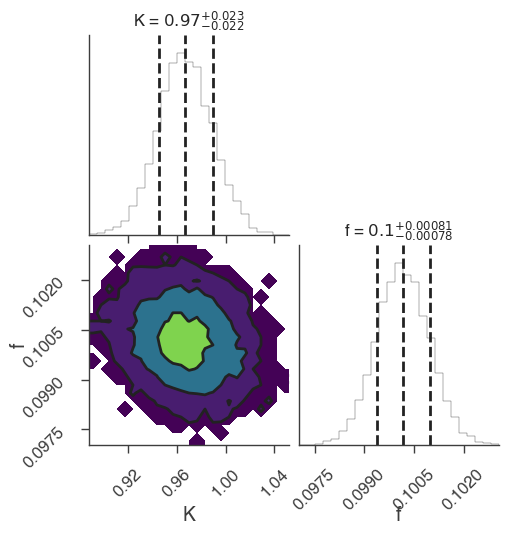

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

06:55:11 INFO      sampler set to ultranest                                                ]8;id=886834;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=741669;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 7605


[ultranest]   logZ = -18.22 +- 0.118


[ultranest] Effective samples strategy satisfied (ESS = 975.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


06:55:22 INFO      fit restored to maximum of posterior                                         ]8;id=574368;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=522676;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=980219;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=550815;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.66 -0.21 +0.23) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.002 -0.008 +0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.741086
total,-9.741086


Values of statistical measures:

,statistical measures
AIC,24.188054
BIC,25.473636
DIC,23.262738
PDIC,1.893160
log(Z),-7.922588


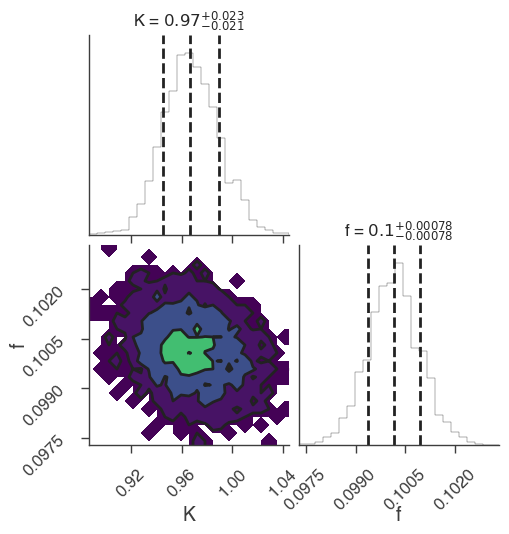

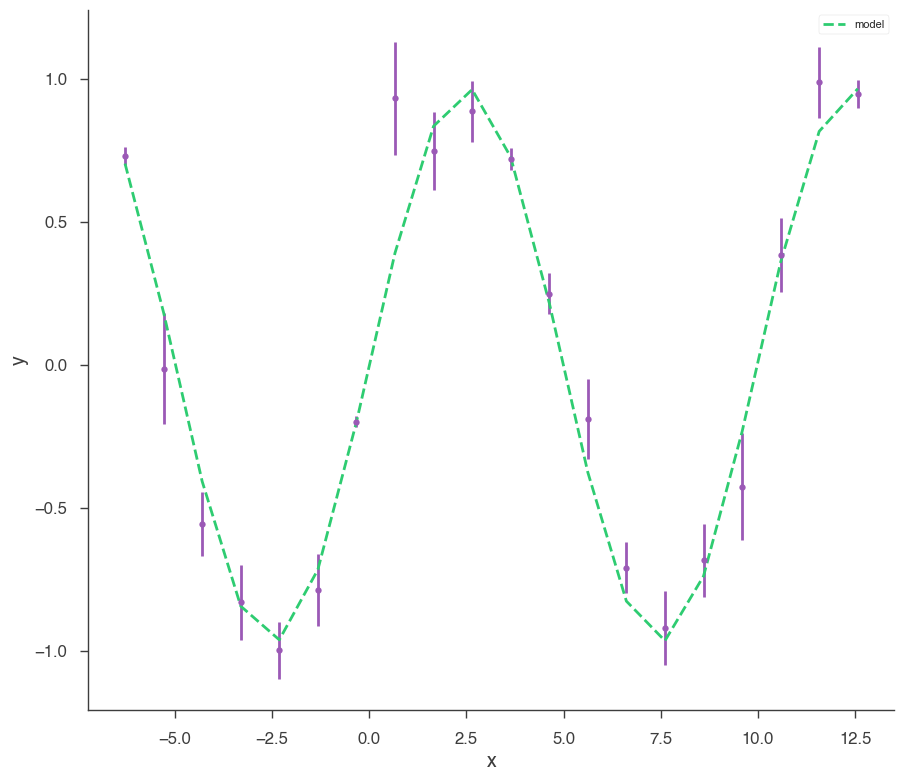

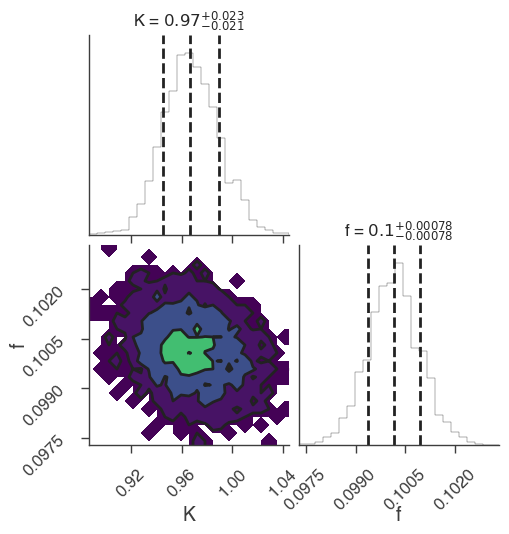

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()